In [29]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Load the partial pre-processed data
data = pd.read_csv("C:\\Users\\rithi\\Downloads\\dataset_cleaned_1_threshold.csv")

# Checking for columns that contain NaN values
columns_with_nan = data.columns[data.isna().any()].tolist()
nan_distribution = data[columns_with_nan].isna().sum()
nan_distribution

CELLSEX      1527
HHADULT      1527
CPDEMO1B        2
VETERAN3       12
EMPLOY1        32
CHILDREN       53
INCOME2        90
WEIGHT2       123
HEIGHT3       135
DEAF          160
DECIDE        177
DIFFWALK      194
DIFFALON      208
SMOKE100      221
ALCDAY5       257
FLUSHOT7      293
SHINGLE2     2062
PNEUVAC4      307
FALL12MN     1706
SEATBELT      320
COLNSCPY     1780
SIGMSCPY     1793
BLDSTOL1     1796
STOOLDNA     1802
HIVTST7       429
PDIABTST     2260
PREDIAB1     2259
ECIGARET     1704
X_METSTAT      77
X_URBSTAT      77
X_CHISPNC    1535
X_MICHD        38
X_DRDXAR2      19
HTIN4         296
HTM4          276
WTKG3         416
X_BMI5        506
X_BMI5CAT     506
X_AIDTST4     429
dtype: int64

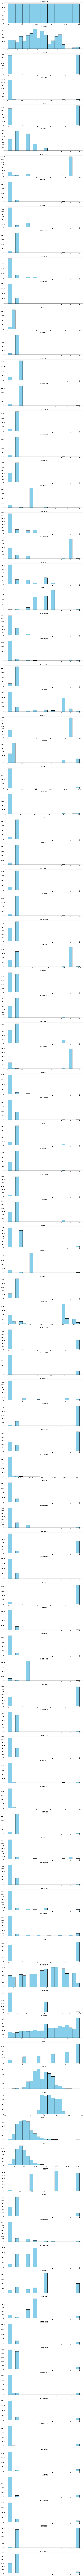

In [31]:
# Identifying numerical columns for histogram visualization
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Adjusting the figure size based on the number of numerical columns
n_rows = len(numerical_cols)
fig, axs = plt.subplots(n_rows, figsize=(10, n_rows*3))

# For only one numeric column
if n_rows == 1:
    axs.hist(data[numerical_cols[0]].dropna(), bins=20, color='skyblue', edgecolor='black')
    axs.set_title(numerical_cols[0])
else:
    for i, column in enumerate(numerical_cols):
        axs[i].hist(data[column].dropna(), bins=20, color='skyblue', edgecolor='black')
        axs[i].set_title(column)

plt.tight_layout()
plt.show()


In [33]:
for i in data.columns:
    print(i)

Unnamed: 0
X_STATE
CELLSEX
HHADULT
SEXVAR
GENHLTH
PHYSHLTH
HLTHPLN1
PERSDOC2
MEDCOST
CHECKUP1
EXERANY2
SLEPTIM1
CVDINFR4
ASTHMA3
CHCSCNCR
CHCOCNCR
CHCCOPD2
HAVARTH4
DIABETE4
LASTDEN4
RMVTETH4
MARITAL
EDUCA
RENTHOM1
CPDEMO1B
VETERAN3
EMPLOY1
CHILDREN
INCOME2
WEIGHT2
HEIGHT3
DEAF
DECIDE
DIFFWALK
DIFFALON
SMOKE100
ALCDAY5
FLUSHOT7
SHINGLE2
PNEUVAC4
FALL12MN
SEATBELT
COLNSCPY
SIGMSCPY
BLDSTOL1
STOOLDNA
HIVTST7
PDIABTST
PREDIAB1
ECIGARET
QSTVER
X_METSTAT
X_URBSTAT
X_IMPRACE
X_CHISPNC
X_DUALUSE
X_LLCPWT
X_RFHLTH
X_PHYS14D
X_HCVU651
X_TOTINDA
X_MICHD
X_LTASTH1
X_CASTHM1
X_ASTHMS1
X_DRDXAR2
X_EXTETH3
X_DENVST3
X_PRACE1
X_MRACE1
X_HISPANC
X_RACE
X_RACEG21
X_RACEGR3
X_RACEPRV
X_SEX
X_AGEG5YR
X_AGE65YR
X_AGE80
X_AGE_G
HTIN4
HTM4
WTKG3
X_BMI5
X_BMI5CAT
X_RFBMI5
X_CHLDCNT
X_EDUCAG
X_INCOMG
X_SMOKER3
X_RFSMOK3
DRNKANY5
DROCDY3_
X_RFBING5
X_DRNKWK1
X_RFDRHV7
X_RFSEAT2
X_RFSEAT3
X_DRNKDRV
X_AIDTST4


In [28]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\rithi\\Downloads\\dataset_cleaned_1_threshold.csv")

# Remove the 'X_LLCPWT' attribute 
df_modified = df.drop(columns=['X_LLCPWT'])

# Fill missing numeric values with mean or median as appropriate
df_modified['X_AGE80'] = df_modified['X_AGE80'].fillna(df_modified['X_AGE80'].mean())
df_modified['HTIN4'] = df_modified['HTIN4'].fillna(df_modified['HTIN4'].mean())
# Assuming HTM4 should be median due to skew
df_modified['HTM4'] = df_modified['HTM4'].fillna(df_modified['HTM4'].median())
df_modified['WTKG3'] = df_modified['WTKG3'].fillna(df_modified['WTKG3'].median())
df_modified['X_BMI5'] = df_modified['X_BMI5'].fillna(df_modified['X_BMI5'].median())

# Get a list of columns that are not the numeric attributes mentioned
categorical_columns = df_modified.columns.drop(['X_AGE80', 'HTIN4', 'HTM4', 'WTKG3', 'X_BMI5'])

# Fill missing values for categorical attributes with their respective mode
for column in categorical_columns:
    df_modified[column] = df_modified[column].fillna(df_modified[column].mode()[0])

# Save the final dataset with all missing values filled
final_filled_file_path = "C:\\Users\\rithi\\Downloads\\dataset_final_filled.csv"
df_modified.to_csv(final_filled_file_path, index=False)




The final filled dataset is saved at: C:\Users\rithi\Downloads\dataset_final_filled.csv


In [37]:
import pandas as pd

# Load the original dataset to retrieve the 'class attribute' column
original_df = pd.read_csv("C:\\Users\\rithi\\Downloads\\project_dataset_5K.csv")

# Load the preprocessed dataset to which we want to add back the 'class attribute'
preprocessed_df = pd.read_csv("C:\\Users\\rithi\\Downloads\\dataset_final_filled.csv")

# Add the 'class attribute' from the original dataset to the preprocessed dataset
# It's important that the rows correspond between the two datasets
preprocessed_df['Class'] = original_df['Class']

# Save the updated dataset with the 'class attribute' added back
final_dataset_with_class_path = "C:\\Users\\rithi\\Downloads\\dataset_final_with_class.csv"
preprocessed_df.to_csv(final_dataset_with_class_path, index=False)

